# L-システム

## 参考文献
* Lindenmayer, A. (1968). Mathematical models for cellular interactions in development. I. Filaments with one-sided inputs. Journal of Theoretical Biology, 18(3), 280–299.
* Lindenmayer, A. (1968). Mathematical models for cellular interactions in development. II. Simple and branching filaments with two-sided inputs. Journal of Theoretical Biology, 18(3), 300–315.
* Lindenmayer, A. (1971). Developmental systems without cellular interactions, their languages and grammars. Journal of Theoretical Biology, 30(3), 455–484.

In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

In [2]:
# ある遷移ルール（全9）
# 状態8 -> 9,[3]が分岐を意味する
def rule(state):
    if state == 1:
        new_state = [2,3]
    elif state == 2:
        new_state = [2]
    elif state == 3:
        new_state = [2,4]
    elif state == 4:
        new_state = [2,5]
    elif state == 5:
        new_state = [6,5]
    elif state == 6:
        new_state = [7]
    elif state == 7:
        new_state = [8]
    elif state == 8:
        new_state = [9,[3]]
    elif state == 9:
        new_state = [9]
    return new_state

In [3]:
# 更新
def update(cells):
    """更新
    
    入力された状態のリストに基づき，次世代の状態のリストを返す．
    
    Args:
        cells: ある時点でのセルの状態のリスト．
    
    Returns:
        new_cells: 次世代のセルの状態のリスト．
    
    """
    cells_tmp = []
    for cell in cells:
        if type(cell) is list:
            # 再帰的定義を利用している
            cells_tmp.append([update(cell)])
        else:
            cells_tmp.append(rule(cell))
    new_cells = [cell for cell_tmp in cells_tmp for cell in cell_tmp]
    return new_cells

In [4]:
# 実行
cells = [1]
cellList = [cells] # セルの状態の遷移を保存したリスト

for n in range(20):
    cells = update(cells)
    cellList.append(copy.copy(cells))

In [5]:
for i in range(12):
    print(str(i)+":",cellList[i])

0: [1]
1: [2, 3]
2: [2, 2, 4]
3: [2, 2, 2, 5]
4: [2, 2, 2, 6, 5]
5: [2, 2, 2, 7, 6, 5]
6: [2, 2, 2, 8, 7, 6, 5]
7: [2, 2, 2, 9, [3], 8, 7, 6, 5]
8: [2, 2, 2, 9, [2, 4], 9, [3], 8, 7, 6, 5]
9: [2, 2, 2, 9, [2, 2, 5], 9, [2, 4], 9, [3], 8, 7, 6, 5]
10: [2, 2, 2, 9, [2, 2, 6, 5], 9, [2, 2, 5], 9, [2, 4], 9, [3], 8, 7, 6, 5]
11: [2, 2, 2, 9, [2, 2, 7, 6, 5], 9, [2, 2, 6, 5], 9, [2, 2, 5], 9, [2, 4], 9, [3], 8, 7, 6, 5]


## 状態列の解釈と可視化
L-システムの処理結果は単純な文字列（ここでは数字の列が格納された（ネストされた）リスト）の更新プロセスを記録したものになっている．
これをある分岐のモデルと解釈して，可視化してみる．
より詳しく知りたい人はturtle interpretationなどをキーワードに調べて見よう．

In [6]:
# 線を生成するための関数
def gen_line(idx,pos,theta,r=1,lwidth=5):
    pos_new = pos + r*np.array([np.cos(theta),np.sin(theta)])
    x=np.array([pos[0],pos_new[0]])
    y=np.array([pos[1],pos_new[1]])
    line = Line2D(x, y, color=cm.rainbow(int(0.125*(idx-1)*255)))
    return (line,pos_new)

# ある時点のセルの状態のリストに基づき分岐パタンを描写するための関数
def interpret(ax, cells, pos_in, theta_in, theta_shift_in):
    """分岐パタンの描写
    
    入力された状態のリストに基づき，分岐パタンを描写する．
    
    Args:
        ax: 描写するための`axes.Axes`オブジェクト
        cells: セルの状態のリスト
        pos_in: 描写の起点となるx,y座標
        theta_in: 描写の向きを指定するx軸からの角度
        theta_shift_in: 分岐角度
    
    Returns:
        ax_new: 分岐パタンを追加した`axes.Axes`オブジェクト
    
    """
    pos = pos_in
    theta = theta_in
    ax_new = ax
    theta_shift = theta_shift_in
    for cell in cells:
        if type(cell) is list:
            # 再帰的定義を利用している
            ax_new = interpret(ax,cell,pos,theta+theta_shift,theta_shift*0.5)
            theta_shift = - theta_shift
        else:
            line,pos = gen_line(cell,pos,theta, r = 0.5, lwidth=8)
        ax_new.add_line(line)
    return ax_new

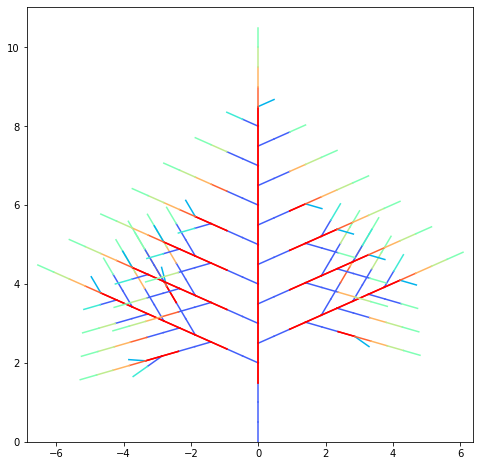

In [7]:
# 描写の実行
fig, ax = plt.subplots(figsize=(8, 8))

ax = interpret(ax,cellList[20],np.array([0,0]),np.pi/2,np.pi*(5/13))

# プロット範囲を設定
xmin = 0
xmax = 0
ymin = 0
ymax = 0 
for line in ax.get_lines():
    xmin_tmp = np.min(line.get_xdata())
    xmax_tmp = np.max(line.get_xdata())
    ymin_tmp = np.min(line.get_ydata())
    ymax_tmp = np.max(line.get_ydata())
    if xmin_tmp < xmin:
        xmin = xmin_tmp
    if xmax_tmp > xmax:
        xmax = xmax_tmp 
    if ymin_tmp < ymin:
        ymin = ymin_tmp
    if ymax_tmp > ymax:
        ymax = ymax_tmp 
ax.set_xlim(xmin-0.05*np.abs(xmin), xmax+0.05*np.abs(xmax))
ax.set_ylim(ymin-0.05*np.abs(ymin), ymax+0.05*np.abs(ymax))

# プロット
plt.show()